# Seasonal Winds
- Roar Collab

In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import glob as glob
import matplotlib.pyplot as plt

In [3]:
file_in_gridmet = "/storage/group/pches/default/users/dcl5300/gridMET/vs/*"
file_paths_vs = sorted(glob.glob(file_in_gridmet))
file_in_hist_MACA = "/storage/group/pches/default/public/MACA-CMIP5/windspeed_files/historical/macav2metdata_ws_"
file_in_rcp45_MACA = "/storage/group/pches/default/public/MACA-CMIP5/windspeed_files/rcp45/macav2metdata_ws_"
maca_v2_paths = sorted(glob.glob(f'{file_in_hist_MACA}*'))
start_year, end_year = 1979, 2025
lon_max_sc = -116.5
lon_min_sc = -118.5
lat_min_sc = 34
lat_max_sc = 36

## gridmet vs

In [4]:
ws_arr = []
for file_paths_i in file_paths_vs:
    ds_i = xr.open_dataset(file_paths_i)
    ds_i = ds_i.where((ds_i.lon >= lon_min_sc) & (ds_i.lon <= lon_max_sc) & 
                                    (ds_i.lat >= lat_min_sc) & (ds_i.lat <= lat_max_sc), drop=True)
    ds_i = ds_i.sel(day=~((ds_i.day.dt.month == 2) & (ds_i.day.dt.day == 29)))
    spatial_aggregate = ds_i.mean(dim=['lon'])
    spatial_aggregate = spatial_aggregate.mean(dim=['lat'])
    ws_arr.append(spatial_aggregate["wind_speed"].values)
    #plt.plot(spatial_aggregate["wind_speed"].values, alpha=.2)
    
los_angeles_wind_climatology = np.array(ws_arr).mean(axis=0)
ninetyseven_5_percentile = np.percentile(ws_arr, 97.5, axis=0)
two_5_percentile = np.percentile(ws_arr, 2.5, axis=0)

## maca vs

In [7]:
# MACA runs for ws
models = ["BNU-ESM", "CNRM-CM5", "CSIRO-Mk3-6-0", "CanESM2", "GFDL-ESM2G", "GFDL-ESM2M", "HadGEM2-CC365", "HadGEM2-ES365", "IPSL-CM5A-LR",
         "IPSL-CM5A-MR", "IPSL-CM5B-LR", "MIROC-ESM-CHEM", "MIROC-ESM", "MIROC5", "bcc-csm1-1-m", "MRI-CGCM3", "bcc-csm1-1", "inmcm4"]

In [9]:
correct_paths

['/storage/group/pches/default/public/MACA-CMIP5/windspeed_files/historical/macav2metdata_ws_BNU-ESM_r1i1p1_historical_1975_1979_CONUS_daily.nc',
 '/storage/group/pches/default/public/MACA-CMIP5/windspeed_files/historical/macav2metdata_ws_BNU-ESM_r1i1p1_historical_1980_1984_CONUS_daily.nc',
 '/storage/group/pches/default/public/MACA-CMIP5/windspeed_files/historical/macav2metdata_ws_BNU-ESM_r1i1p1_historical_1985_1989_CONUS_daily.nc',
 '/storage/group/pches/default/public/MACA-CMIP5/windspeed_files/historical/macav2metdata_ws_BNU-ESM_r1i1p1_historical_1990_1994_CONUS_daily.nc',
 '/storage/group/pches/default/public/MACA-CMIP5/windspeed_files/historical/macav2metdata_ws_BNU-ESM_r1i1p1_historical_1995_1999_CONUS_daily.nc',
 '/storage/group/pches/default/public/MACA-CMIP5/windspeed_files/historical/macav2metdata_ws_BNU-ESM_r1i1p1_historical_2000_2004_CONUS_daily.nc',
 '/storage/group/pches/default/public/MACA-CMIP5/windspeed_files/historical/macav2metdata_ws_BNU-ESM_r1i1p1_historical_2005_

In [24]:
for model_i in models[:1]:
    mavav2_hist_paths = f'{file_in_hist_MACA}{model_i}*'
    mavav2_rcp45_paths = f'{file_in_rcp45_MACA}{model_i}*'
    sorted_hist_paths = sorted(glob.glob(mavav2_hist_paths))
    sorted_rcp45_paths = sorted(glob.glob(mavav2_rcp45_paths))
    all_paths = sorted_hist_paths + (sorted_rcp45_paths)
    correct_paths = []
    for path_i in all_paths:
        start_year_i = int(path_i.split("_")[-4])
        end_year_i = int(path_i.split("_")[-3])
        if ((start_year_i >= start_year) and (end_year_i <= end_year)) or (end_year_i == start_year) or (start_year_i == end_year):
            correct_paths.append(path_i)
    ds_model_i_ws = xr.open_mfdataset(correct_paths)
    ds_model_i_ws["lon"] = np.where(ds_model_i_ws["lon"] > 180, ds_model_i_ws["lon"] - 360, ds_model_i_ws["lon"])
    ds_model_i_ws = ds_model_i_ws.where((ds_model_i_ws.lon >= lon_min_sc) & (ds_model_i_ws.lon <= lon_max_sc) & 
                                    (ds_model_i_ws.lat >= lat_min_sc) & (ds_model_i_ws.lat <= lat_max_sc), drop=True)
    ds_model_i_ws = ds_model_i_ws.sel(time=~((ds_model_i_ws.time.dt.month == 2) & (ds_model_i_ws.time.dt.day == 29)))
    spatial_aggregate_maca = ds_model_i_ws.mean(dim=['lon'])
    spatial_aggregate_maca = spatial_aggregate_maca.mean(dim=['lat'])
    spatial_aggregate_maca_timeslice = spatial_aggregate_maca.sel(time=slice('1979-01-01', '2022-10-31'))

In [23]:
spatial_aggregate_maca.plot()

ValueError: Dataset.plot cannot be called directly. Use an explicit plot method, e.g. ds.plot.scatter(...)

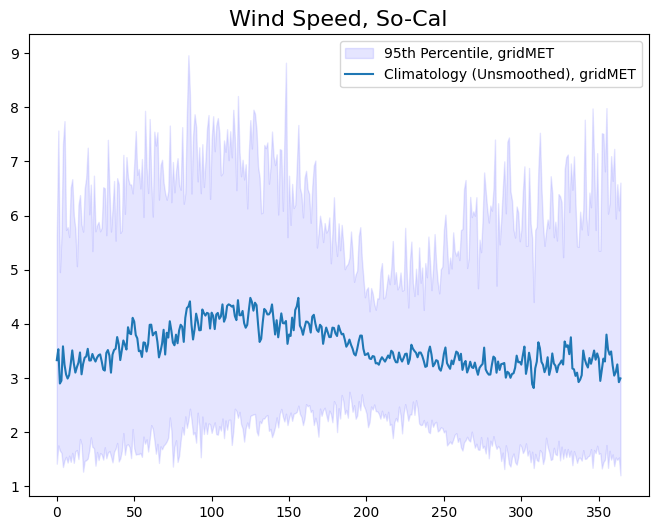

In [5]:
plt.figure(figsize=(8,6))
plt.title('Wind Speed, So-Cal', fontsize=16)
plt.fill_between(np.arange(0,365), ninetyseven_5_percentile, two_5_percentile, label="95th Percentile, gridMET", color='b', alpha=.1)
plt.plot(los_angeles_wind_climatology, label='Climatology (Unsmoothed), gridMET')
plt.legend()

In [5]:
glob.glob(f'{file_in_base_MACA}/*')

[]